<h1>Nomes do Brasil</h1>

<p>Esse notebook se destina a oferecer uma visão sobre os principais nomes utilizados no Brasil.</p>

## Importações
<p>Principais bibliotecas do Python utilizadas, e também arquivos do projeto.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import ast

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from src.principal import AcessoAPINomeIBGE
from itertools import chain
from PIL import Image

## Arquivos Externos
<p>Localização dos arquivos que serão utilizados, basicamente os arquivos da pasta data, os .csv as imagens</p>

In [2]:
states = 'data/estados.csv'
cities = 'data/municipios.csv'
apis_ibge = 'data/links_APIs.csv'
brazil_country_image = 'img/Mapa_do_Brasil_com_a_Bandeira_Nacional.png'

## Inicializando alguns objetos

### Carregando as string de conexão

In [3]:
pr = AcessoAPINomeIBGE(apis_ibge)

In [4]:
pr.fn_captar_strings_conexao_arquivo_csv()

### String Captadas

In [5]:
pr.lst_apis_ibge

['https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?sexo={sexo}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?groupBy=UF',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/{nomes}?localidade={municipioEstado}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking/?decada={decada}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking?localidade={municipioEstado}',
 'https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking/?sexo={sexo}']

## Funções de Suporte
<p>Funções que provem suporte em alguma operações aqui no notrebook, principalmente, operações que podem ser executadas mais de uma vez.</p>

In [6]:
def fn_converte_lst_de_freq_de_um_nome_em_lista_de_dicionario(lista):
    """
        Function: função que retorna uma lista com a frequencia de um nome ao longo das decadas. Essa função
                não faz a busca dos dados, ela faz um tratamento nos dados já existentes, tornando-os mais
                fáceis de serem manipulados
                
        Args:
            list: lista com a frequencia dos nomes por decadas, 
                gerada pela função 'fn_IBGE_buscar_frequencia_um_nome_por_decadas'

        Return:
            list: lista de dicionarios com as informações 'organizadas' de nomes, frequencias e decadas
    """
    lst_retorno = []
    str_aux = ''
    for li in lista:        
        for i_nome in range(9):# Admite-se apenas 9 décadas 
            # A informação sobre o periodo pode vir da seguinte forma:
            ## 'periodo': '1930['
            ## 'periodo': '[1930,1940['
            # Sendo assim sera necessario fazer um slice da string
            
            if len(li['res'][i_nome]['periodo']) == 5:
                str_aux = li['res'][i_nome]['periodo'][:-1]
            elif len(li['res'][i_nome]['periodo']) == 11:
                str_aux = li['res'][i_nome]['periodo'][6:-1]
                
            # Geração do dicionario
            dic_name ={ "nome":str(li['nome']),
                        "sexo": str(li['sexo']),
                        "localidade": str(li['localidade']),
                        "decada": str_aux,
                        "frequencia": str(li['res'][i_nome]['frequencia'])}
            
            # Inserindo o dicionario em uma lista
            lst_retorno.append(dic_name)
    return lst_retorno

## Ranking dos nomes mais utilizados

### Exibir algumas informações da função que se comunica com a API

In [7]:
print(pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes.__doc__)


            Function: função que retorna uma lista com o rank dos nomes mais frequentes
    
            Args:
    
            Return:
                int: resposta http
                list: lista com as informações
        


### Tratamento de Dados

In [8]:
# Captar as informações da API e armazena-las em uma lista
int_response, lst_names_ranking = pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes()

In [9]:
# Usando uma list comprehesion, para captar apenas uma lista de nomes
lst_names_ranking_aux = [ra['res'] for ra in lst_names_ranking]

In [10]:
# Exibir informações da lista
lst_names_ranking_aux[0][0:3]

[{'nome': 'MARIA', 'frequencia': 11734129, 'ranking': 1},
 {'nome': 'JOSE', 'frequencia': 5754529, 'ranking': 2},
 {'nome': 'ANA', 'frequencia': 3089858, 'ranking': 3}]

In [11]:
# Gerar um dataframe com a lista captada
df_names_ranking = pd.DataFrame(list(chain.from_iterable(lst_names_ranking_aux)))

In [12]:
df_names_ranking.head(3)

,frequencia,nome,ranking
0,11734129,MARIA,1
1,5754529,JOSE,2
2,3089858,ANA,3


In [13]:
# Dimensão do DataFrame
df_names_ranking.shape

(20, 3)

In [14]:
# Remover a coluna ranking
df_names_ranking.drop(['ranking'], 
                      axis = 1,
                      inplace = True) 

# Renomear as colunas
df_names_ranking.rename(columns = {'nome': 'Name', 
                                   'frequencia': 'Frequency'},
                        inplace = True)

# Para Garantir certa consistencia na plotagem de barras, tornar todas as colunas do tipo striug
df_names_ranking.columns = list(map(str, df_names_ranking.columns))

# Fazer com que o propŕio nome seja o indice do dataframe
df_names_ranking.set_index('Name', inplace = True)


In [15]:
df_names_ranking.head(2)

,Frequency
Name,
MARIA,11734129
JOSE,5754529


### Plotagem de Barras com os nomes mais utilizados

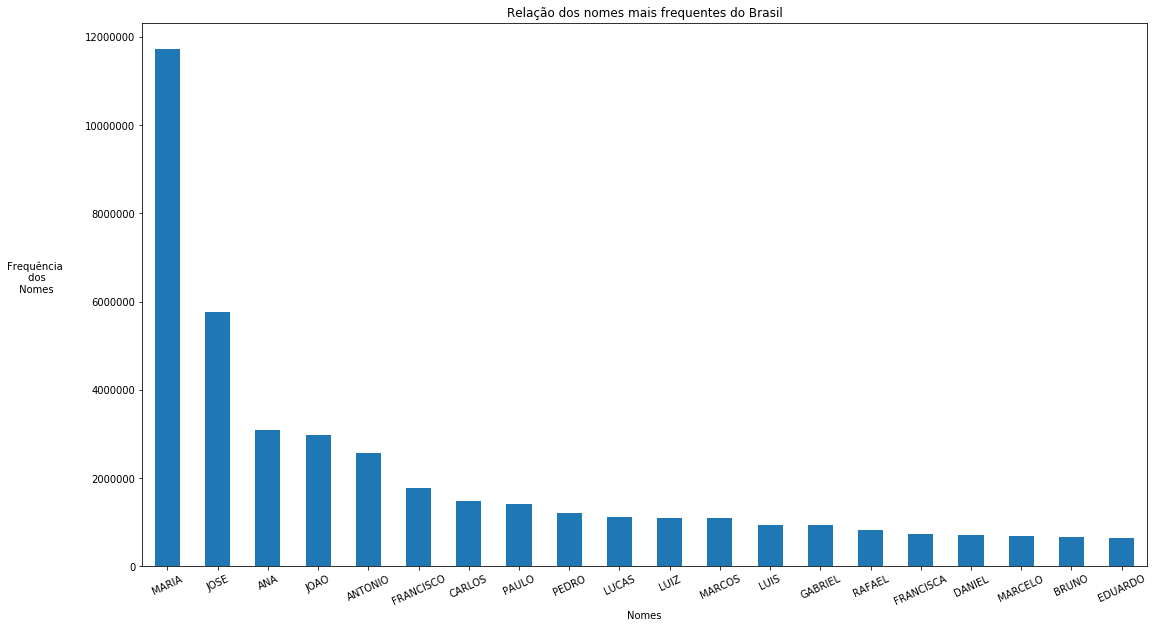

In [16]:
# Confogurando o gráfico
df_names_ranking.plot(kind = "bar", 
                      figsize = (18, 10),
                      legend = None
                     )
# Configurar o gráfico para que ele desconsidere a notação científica
plt.ticklabel_format(style = 'plain', 
                     axis = 'y')

# Titulo
plt.title("Relação dos nomes mais frequentes do Brasil")

# Legenda do Eixo X
plt.xlabel("Nomes")

# Rotacionar os dados do Eixo X
plt.xticks(rotation = 25)

# Legenda do Eixo Y
plt.ylabel("Frequência\n dos\n Nomes", 
           labelpad = 50, # Afastamento em relação ao dados do Eixo Y
           rotation = 0 # Rotação do texto 
          )


# Mostrar o Gráfico
plt.show()


### Wordcloud com os Nomes mais Utilizados
<p>Dado o fato que, o que possuimos dos nomes mais frequentes do Brasil se tratam exclusivamente de uma tabela com o nome e sua frequencia, que precisaremos montar uma estrutura simples para utilizar a Wordcloud, pois ela conta a frequencia das palavras em um texto, mas no nosso caso essa frequencia ja esta contada</p>

#### Tratando os Dados

In [17]:
# Criar uma variavel com a frequencial total de todos os nomes 
var_int_frequencia_total = df_names_ranking['Frequency'].sum()
var_str_texto = ''

# O pulo do gato no codigo vai ser criar um texto onde cada nome aparecerá baseado na frequencia 
maximo_palavras = 100
for nome in df_names_ranking.index.values:
    # Ver se tem nome Composto
    if len(nome.split(' ')) == 1:
        repeat_num_times = int(df_names_ranking.loc[nome, 'Frequency']/float(var_int_frequencia_total)*maximo_palavras)
        var_str_texto = var_str_texto + ((nome + ' ') * repeat_num_times)
                                     
# Mostrar o Texto Gerado
var_str_texto


'MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA MARIA JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE JOSE ANA ANA ANA ANA ANA ANA ANA JOAO JOAO JOAO JOAO JOAO JOAO JOAO ANTONIO ANTONIO ANTONIO ANTONIO ANTONIO ANTONIO FRANCISCO FRANCISCO FRANCISCO FRANCISCO CARLOS CARLOS CARLOS PAULO PAULO PAULO PEDRO PEDRO LUCAS LUCAS LUIZ LUIZ MARCOS MARCOS LUIS LUIS GABRIEL GABRIEL RAFAEL FRANCISCA DANIEL MARCELO BRUNO EDUARDO '

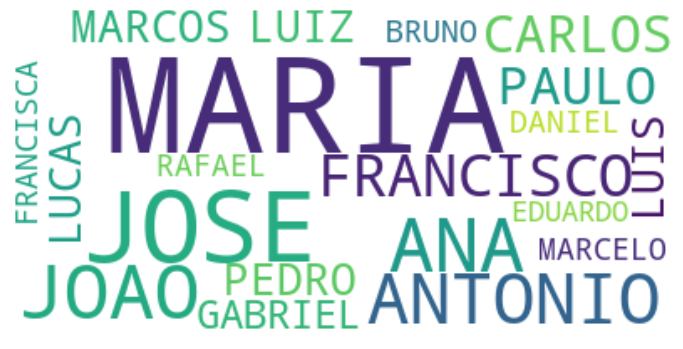

In [18]:
# Criar o Objeto com os nomes
wordcloud = WordCloud(background_color='white', # Cor de Fundo
                      collocations=False # Desconsiderar Palavras repetidas
                     ).generate(var_str_texto) # Fonte que no cso é a variavel texto

# Configurações da Figura
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(18)

plt.imshow(wordcloud, 
           interpolation='bilinear')

plt.axis('off')
plt.show()

<p>Uma vez montado a Wordcloud com os nomes mais frequenctes, poderíamos também aplicar uma mascara pois os nomes mais frequentes são do Brasil, logo estes poderiam estar incluidos em uma imagem da extensão terrritorial do pais.</p>

In [19]:
# Tranformar a imagem do brazil em um array
brazil_mask = np.array(Image.open(brazil_country_image))

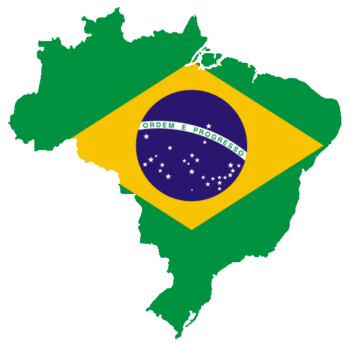

In [20]:
# Validar se a imagem foi carregada
fig = plt.figure()
fig.set_figwidth(6) # set width
fig.set_figheight(10) # set height

plt.imshow(brazil_mask, 
           cmap = plt.cm.gray, 
           interpolation='bilinear')

plt.axis('off')
plt.show()

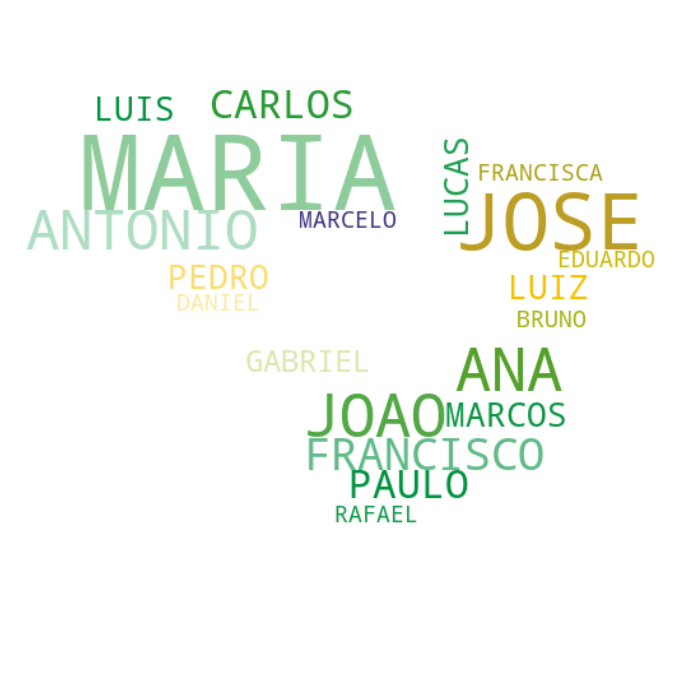

In [21]:
# Criar o Objeto Word Cloud com algumas configurações e já setando a mascara, que é a imagem do Brasil
brazil_word_cloud = WordCloud(background_color = 'white', # Cor de Fundo
                              collocations = False, # Desconsiderar textos repetidos
                              max_words = 20, # Máximo de palavras mostradas
                              mask = brazil_mask, # Mascara
                              max_font_size = 90, # Tamanho de Fonte maximo
                              random_state = 42)

# Atribuir ao Objeto Word Cloud o Texto com os nomes mais frequentes
brazil_word_cloud.generate(var_str_texto)

# Como a imagem esta com a cor da bandeira, os nomes assumiram essa cor conforme seja distribuidos nela
image_colors = ImageColorGenerator(brazil_mask)

# Dimensões da imagem
fig = plt.figure()
fig.set_figwidth(12) 
fig.set_figheight(18) 

# Gerando a Imagem
plt.imshow(brazil_word_cloud.recolor(color_func = image_colors), # Recolorir a imagem conforme a cor da mascara 
           interpolation='bilinear')

# Ocultar as margens
plt.axis('off')

# Mostrar a imagem
plt.show()

## Ranking dos nomes mais utilizados por década

<p>Será feita uma analise dos nomes mais utilizados entres as décadas de 1930 e 2010</p>

In [22]:
print(pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes_por_decada.__doc__)


            Function: função que retorna uma lista com os nomes mais frequentes usados em uma determinada decada
    
            Args:
                int: decada a ser pesquisada
            Return:
                int: resposta http
                list: lista com as informações da frequencia do nome
        


<p>Uma vez obtido a informação dos nomes mais utilizados em uma década, podemos utilizar uma estrutura para trazer todos de uma vez, sem precisar replicar o mesmo código n vezes</p>

In [23]:
lst_decades = list(map(int, range(1930, 2020,10))) # 1930 - 2010
lst_names_ranking_aux = []
lst_names_ranking = []
for dec in lst_decades:
    int_response, lst_names_ranking_aux = pr.fn_IBGE_listar_ranking_dos_nomes_mais_frequentes_por_decada(dec)
    if int_response == 200: # OK
        for es in lst_names_ranking_aux:
            es.update( {"decada":dec}) 
        lst_names_ranking += lst_names_ranking_aux
    # 1 Segundo de espera até a próxima requisição
    time.sleep(1)

<p>Foi gerada uma lista unidimensional onde cada 'linha' possui uma lista com as informações da API, e ao mesmo tempo, foi acrescido uma chave com a informação da década de referência <p>

In [24]:
lst_names_ranking[0:1]

[{'localidade': 'BR',
  'sexo': None,
  'res': [{'nome': 'MARIA', 'frequencia': 336477, 'ranking': 1},
   {'nome': 'JOSE', 'frequencia': 118121, 'ranking': 2},
   {'nome': 'ANTONIO', 'frequencia': 60651, 'ranking': 3},
   {'nome': 'JOAO', 'frequencia': 60155, 'ranking': 4},
   {'nome': 'ANA', 'frequencia': 33395, 'ranking': 5},
   {'nome': 'FRANCISCO', 'frequencia': 33338, 'ranking': 6},
   {'nome': 'MANOEL', 'frequencia': 28241, 'ranking': 7},
   {'nome': 'FRANCISCA', 'frequencia': 27317, 'ranking': 8},
   {'nome': 'ANTONIA', 'frequencia': 22746, 'ranking': 9},
   {'nome': 'PEDRO', 'frequencia': 21483, 'ranking': 10},
   {'nome': 'JOSEFA', 'frequencia': 19421, 'ranking': 11},
   {'nome': 'RAIMUNDO', 'frequencia': 17300, 'ranking': 12},
   {'nome': 'SEBASTIAO', 'frequencia': 17299, 'ranking': 13},
   {'nome': 'RAIMUNDA', 'frequencia': 16455, 'ranking': 14},
   {'nome': 'ROSA', 'frequencia': 15097, 'ranking': 15},
   {'nome': 'JOANA', 'frequencia': 14520, 'ranking': 16},
   {'nome': 'JO

Pra facilitar a confecção do dataframe, será gerada uma nova lista, onde cada nome e sua respectiva, frequência virá acompanhado de sua dácada de referência

In [25]:
lst_names_rankink_decade = []
# Iterar a Lista decada por decada, que no caso, foram 9 decadas computadas
for decada in lst_names_ranking:
    # Iterar a lista nome por nome, que no caso foram 20 frequencias por decada
    for i_nome in range(20):
        dic_names_ranking_decade ={ "nome":str(decada['res'][i_nome]['nome']),
                                    "frequencia": int(decada['res'][i_nome]['frequencia']),
                                    "ranking": int(decada['res'][i_nome]['ranking']),
                                    "decada": int(decada['decada'])}
        lst_names_rankink_decade.append(dic_names_ranking_decade)
        

In [26]:
lst_names_rankink_decade[0:2]

[{'nome': 'MARIA', 'frequencia': 336477, 'ranking': 1, 'decada': 1930},
 {'nome': 'JOSE', 'frequencia': 118121, 'ranking': 2, 'decada': 1930}]

### Tratamento de Dados com o DataFrame


In [27]:
# Gerando o Dataframe
df_names_ranking_dec = pd.DataFrame(lst_names_rankink_decade)

In [28]:
df_names_ranking_dec.head(5)

,decada,frequencia,nome,ranking
0,1930,336477,MARIA,1
1,1930,118121,JOSE,2
2,1930,60651,ANTONIO,3
3,1930,60155,JOAO,4
4,1930,33395,ANA,5


In [29]:
# Remover a coluna ranking
df_names_ranking_dec.drop(['ranking'], 
                      axis = 1,
                      inplace = True) 

# Renomear as colunas
df_names_ranking_dec.rename(columns = {'nome': 'Name', 
                                       'frequencia': 'Frequency',
                                       'decada': 'Decade'},
                        inplace = True)

# Para Garantir certa consistencia na plotagem de barras, tornar todas as colunas do tipo striug
df_names_ranking.columns = list(map(str, df_names_ranking.columns))

In [30]:
df_names_ranking_dec.head(3)

,Decade,Frequency,Name
0,1930,336477,MARIA
1,1930,118121,JOSE
2,1930,60651,ANTONIO


## Analise da frequencia dos nomes Maria, José e João ao longo das décadas
<p>Aqui faremos uma analise do quão frequentes esse nomes foram utilizados ao longo dos décadas, utilizando um gráfico de linhas ao final.</p>

In [31]:
print(pr.fn_IBGE_buscar_frequencia_um_nome_por_decadas.__doc__)


            Function: função que retorna uma lista com as decadas com a frequencia de um nome passado
    
            Args:
                string: nome a ser pesquisado
    
            Return:
                int: resposta http
                list: lista com as informações da frequencia do nome
        


In [32]:
# Captar as informações da API e armazena-las em uma lista para cada nome
int_response, lst_nms_maria = pr.fn_IBGE_buscar_frequencia_um_nome_por_decadas('Maria')
time.sleep(1)
int_response, lst_nms_jose = pr.fn_IBGE_buscar_frequencia_um_nome_por_decadas('Jose')
time.sleep(1)
int_response, lst_nms_joao = pr.fn_IBGE_buscar_frequencia_um_nome_por_decadas('Joao')


In [33]:
# Verificar uma das listas geradas conforme retorno da própria API
lst_nms_maria

[{'nome': 'MARIA',
  'sexo': None,
  'localidade': 'BR',
  'res': [{'periodo': '1930[', 'frequencia': 336477},
   {'periodo': '[1930,1940[', 'frequencia': 749053},
   {'periodo': '[1940,1950[', 'frequencia': 1487042},
   {'periodo': '[1950,1960[', 'frequencia': 2476482},
   {'periodo': '[1960,1970[', 'frequencia': 2495491},
   {'periodo': '[1970,1980[', 'frequencia': 1616019},
   {'periodo': '[1980,1990[', 'frequencia': 917968},
   {'periodo': '[1990,2000[', 'frequencia': 544296},
   {'periodo': '[2000,2010[', 'frequencia': 1111301}]}]

In [34]:
# Da forma como a API nos retorna os dados, fica um pouco dificil para trabalhar, principalmente, na montagem
# dos dataframes, então utilizaremos uma função que transformara essa lista 'desordenada', em uma lista
# de dicionarios, onde cada linha correspondera ao nome, decada e frequencia apropriadas, facilitando assim
# a analise

lst_dct_joao = fn_converte_lst_de_freq_de_um_nome_em_lista_de_dicionario(lst_nms_joao)
lst_dct_maria = fn_converte_lst_de_freq_de_um_nome_em_lista_de_dicionario(lst_nms_maria)
lst_dct_jose = fn_converte_lst_de_freq_de_um_nome_em_lista_de_dicionario(lst_nms_jose)

In [35]:
lst_dct_joao[0:2]

[{'nome': 'JOAO',
  'sexo': 'None',
  'localidade': 'BR',
  'decada': '1930',
  'frequencia': '60155'},
 {'nome': 'JOAO',
  'sexo': 'None',
  'localidade': 'BR',
  'decada': '1940',
  'frequencia': '141772'}]

#### DataFrames de frequencias dos nomes João, José e Maria

In [74]:
# Dataframes de frequencia
df_freq_maria = pd.DataFrame(lst_dct_maria)
df_freq_jose = pd.DataFrame(lst_dct_jose)
df_freq_joao = pd.DataFrame(lst_dct_joao)

In [70]:
df_freq_maria.head(3)

,decada,frequencia,localidade,nome,sexo
0,1930,336477,BR,MARIA,None
1,1940,749053,BR,MARIA,None
2,1950,1487042,BR,MARIA,None


In [62]:
df_freq_jose.head(3)

,decada,frequencia,localidade,nome,sexo
0,1930,118121,BR,JOSE,None
1,1940,311202,BR,JOSE,None
2,1950,648754,BR,JOSE,None


In [63]:
df_freq_joao.head(3)

,decada,frequencia,localidade,nome,sexo
0,1930,60155,BR,JOAO,None
1,1940,141772,BR,JOAO,None
2,1950,256001,BR,JOAO,None


In [75]:
# Ajustes nos DataFrames
# Remover as colunas sexo e localidade
df_freq_joao.drop(['sexo','localidade'], axis = 1, inplace = True)
df_freq_jose.drop(['sexo','localidade'], axis = 1, inplace = True)
df_freq_maria.drop(['sexo','localidade'], axis = 1, inplace = True)

# Renomear as colunas
df_freq_joao.rename(columns = {'nome': 'Name', 'frequencia': 'Frequency', 'decada':'Decade'}, inplace = True)
df_freq_jose.rename(columns = {'nome': 'Name', 'frequencia': 'Frequency', 'decada':'Decade'}, inplace = True)
df_freq_maria.rename(columns = {'nome': 'Name', 'frequencia': 'Frequency', 'decada':'Decade'}, inplace = True)

# Para Garantir certa consistencia na plotagem de barras, tornar todas as colunas do tipo striug
df_freq_joao.columns = list(map(str, df_freq_joao.columns))
df_freq_jose.columns = list(map(str, df_freq_jose.columns))
df_freq_maria.columns = list(map(str, df_freq_maria.columns))


In [65]:
df_freq_joao.head(3)

,Decade,Frequency,Name
0,1930,60155,JOAO
1,1940,141772,JOAO
2,1950,256001,JOAO


In [114]:
# Para que a Analise fique mais facil, inclusive na parte da plotagem, que o ideal seria que cada decada fosse
# uma coluna e seu valor em relação a linha fosse justamente a frequencia, dessa forma para cada um dos
# dataframes que criamos relacionados aos nomes poderiamos ter apenas uma linha com uma coluna para o nome
# e nove para as decadas, e onde cada linha correspondentes as colunas tivessem as frequencias das décadas

# Utilizando a Função Pivot
df_joao = df_freq_joao.pivot(index = 'Name', columns = 'Decade', values = 'Frequency')
df_maria = df_freq_maria.pivot(index = 'Name', columns = 'Decade', values = 'Frequency')
df_jose = df_freq_jose.pivot(index = 'Name', columns = 'Decade', values = 'Frequency')

# Alterando as informações dos indices do novo dataframe criado
del df_joao.columns.name
del df_maria.columns.name
del df_jose.columns.name

In [116]:
df_joao.head(2)

,1930,1940,1950,1960,1970,1980,1990,2000,2010
Name,,,,,,,,,
JOAO,60155,141772,256001,396438,429148,279975,273960,352552,794118


In [135]:
# Uma vez agrupados os Dataframes, podemos concatená-los em apenas um dataframe de modo a obter maior
# facilidade na analise

# Concatenando os dataframes em um unico
df_analysis_names = pd.concat([df_joao,df_jose, df_maria], axis = 0)

# Realizar a Transposição do dataframe
lst_decades = list(map(str, range(1930, 2020,10))) # Lista com as decadas de 1930 a 2010
df_analysis_names = df_analysis_names[lst_decades].transpose()

# Converter as frequencias relacionadas aos nomes e decadas em numeros
df_analysis_names=df_analysis_names.astype(int)

In [140]:
# Tipos das colunas do dataframe
df_analysis_names.dtypes

Name
JOAO     int64
JOSE     int64
MARIA    int64
dtype: object

In [141]:
df_analysis_names.head(5)

Name,JOAO,JOSE,MARIA
1930,60155,118121,336477
1940,141772,311202,749053
1950,256001,648754,1487042
1960,396438,1082782,2476482
1970,429148,1242231,2495491


#### Realizando a Plotagem com gráfico de Área

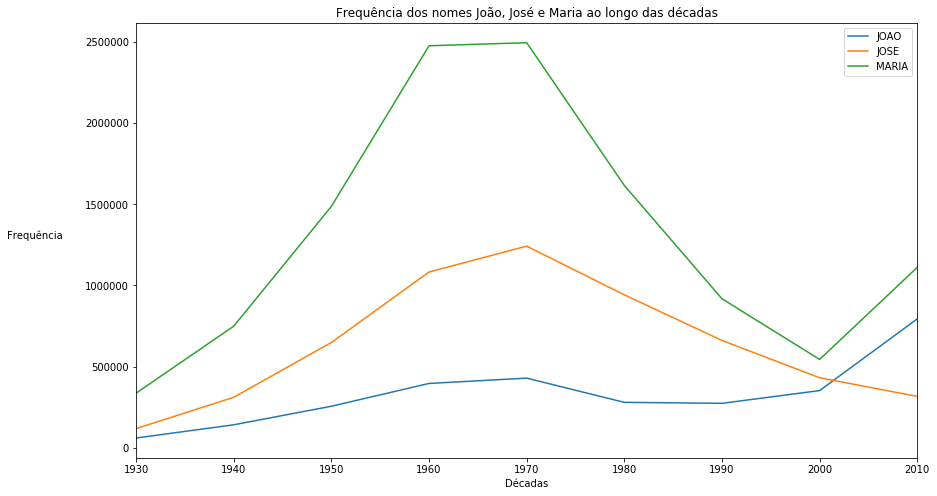

In [147]:
# Tipo de Gráfico
df_analysis_names.plot(kind = 'line', 
                       figsize=(14, 8),
                       label = None)
# Titulo do Gráfico
plt.title("Frequência dos nomes João, José e Maria ao longo das décadas")

# Legenda do Eixo Y
plt.ylabel("Frequência", 
           labelpad = 50, # Afastamento em relação ao dados do Eixo Y
           rotation = 0 # Rotação do texto 
          )

#Legenda do Eixo X
plt.xlabel("Décadas")

plt.legend()

plt.show()